# Analysis of raw dataset

In [1]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('raw_data.csv').drop(columns=['Unnamed: 0'])
df.keys()

Index(['EAN', 'amount', 'brand', 'capacity', 'category', 'description',
       'extras', 'image_url', 'ingredients', 'origin', 'price', 'seller',
       'storage', 'title', 'url', 'weight'],
      dtype='object')

In [3]:
df.dtypes

EAN            object
amount         object
brand          object
capacity       object
category       object
description    object
extras         object
image_url      object
ingredients    object
origin         object
price          object
seller         object
storage        object
title          object
url            object
weight         object
dtype: object

In [4]:
df = df.sample(frac=1) # shuffle data
df.head()

,EAN,amount,brand,capacity,category,description,extras,image_url,ingredients,origin,price,seller,storage,title,url,weight
4962,5900627092134,19 ml,AIR WICK,19 ml,"Środki czystości, chemia > Czyszczenie > Odświ...","Tylko składniki, których potrzebujesz\n\nWspan...",NaN,"https://www.frisco.pl/pid,123169/n,air-wick-bo...",NaN,NaN,14.99,Frisco,Przechowywać w oryginalnym pojemniku lub zatwi...,AIR WICK Botanica Odświeżacz powietrza Marokań...,"https://www.frisco.pl/pid,123169/n,air-wick-bo...",NaN
2504,5900627024210,750 ml,CILLIT BANG,750 ml,"Środki czystości, chemia > Czyszczenie > Środk...",Nasz wyjątkowo skuteczny płyn Cillit Bang Odtł...,NaN,"https://www.frisco.pl/pid,24211/n,cillit-bang-...",Zawiera: <5%: anionowe środki powierzchniowo c...,NaN,10.99,Frisco,NaN,CILLIT BANG Super Silny Środek do tłuszczu - s...,"https://www.frisco.pl/pid,24211/n,cillit-bang-...",NaN
3648,5907513213765,50 g,Pachnąca Szafa,NaN,"Środki czystości, chemia > Czyszczenie > Odświ...",Dekoracyjny odświeżacz powietrza Zielona Herba...,NaN,"https://www.frisco.pl/pid,98173/n,pachnaca-sza...",NaN,NaN,15.99,Frisco,NaN,Pachnąca Szafa Dekoracyjny Odświeżacz Powietrz...,"https://www.frisco.pl/pid,98173/n,pachnaca-sza...",Waga brutto 206
3921,4009175924117,750 ml,FROSCH,750 ml,"Środki czystości, chemia > Pranie > FROSCH Bab...","Właściwości\n- Idealny dodatek do prania, któr...",NaN,"https://www.frisco.pl/pid,120095/n,frosch-baby...",5-15% kationowe środki powierzchniowo czynne\n...,NaN,11.99,Frisco,Data ważności: 1 rok od daty produkcji podanej...,FROSCH Baby Koncentrat do płukania ubranek nie...,"https://www.frisco.pl/pid,120095/n,frosch-baby...",Waga brutto 806
8548,5904215923589,649 gram,Gomar Pińczów,649 gram,napoje,,"{'nutritional': '', 'package': ' butelka szkla...",['http://www.swiadomezakupy.pl/uploads/product...,NaN,NaN,NaN,Swiadome zakupy,NaN,Syrop z owoców maliny,http://www.swiadomezakupy.pl/products/view/173...,NaN


## Data cleaning
Drop corupted data from swiadome zakupy

In [5]:
df = df[df['seller'] != '']

Choose records with EAN and title available

In [6]:
df = df.dropna(subset=['EAN', 'title'], how='any')

Drop unknown sellers

In [7]:
df['seller'].unique()
df = df[df['seller'] != '7.19']

Extract the main category from category tree.

In [8]:
categories = df['category'].str.split('>', n=1, expand=True)
categories.head()

,0,1
4962,"Środki czystości, chemia",Czyszczenie > Odświeżacze powietrza > Elektry...
2504,"Środki czystości, chemia",Czyszczenie > Środki do kuchni i łazienki > P...
3648,"Środki czystości, chemia",Czyszczenie > Odświeżacze powietrza > Patyczk...
3921,"Środki czystości, chemia",Pranie > FROSCH Baby Koncentrat do płukania u...
8548,napoje,None


In [9]:
df['main_category'] = categories[0]
df['main_category'] = df['main_category'].str.lower()
df['main_category'] = df['main_category'].str.strip()
df.groupby(by='main_category').count().sort_values(by='EAN', ascending=False)

,EAN,amount,brand,capacity,category,description,extras,image_url,ingredients,origin,price,seller,storage,title,url,weight
main_category,,,,,,,,,,,,,,,,
napoje,3353,3319,3165,3295,3353,3353,1222,3353,2037,255,3045,3353,2062,3353,3353,1670
"środki czystości, chemia",2430,2430,2430,1241,2430,2430,2,2430,1522,735,2430,2430,1096,2430,2430,1867
drogeria,791,790,774,0,791,556,1,791,630,320,791,791,418,791,791,0
chemia,688,542,408,542,688,684,1,688,477,310,688,688,352,688,688,542
woda i napoje,586,583,574,0,586,339,209,586,467,150,584,586,575,586,586,0
alkohol,323,254,154,319,323,277,222,316,37,43,168,315,30,323,316,115
bio,86,86,86,64,86,86,0,86,30,12,86,86,29,86,86,26
soki świeże i tłoczone,40,37,34,37,40,40,6,40,10,0,40,40,34,40,40,37
mama i dziecko,24,24,24,6,24,24,4,24,18,4,24,24,10,24,24,18


Unify category names

In [10]:
def map_prime_category(data, old_value, new_value):
    data.at[df['main_category'] == old_value, 'main_category'] = new_value
    return data

df = map_prime_category(df, 'woda i napoje', 'napoje')
df = map_prime_category(df, 'soki świeże i tłoczone', 'napoje')
df = map_prime_category(df, 'środki czystości, chemia', 'chemia')
df = map_prime_category(df, 'drogeria', 'chemia')
df.groupby(by='main_category').count().sort_values(by='EAN', ascending=False)

,EAN,amount,brand,capacity,category,description,extras,image_url,ingredients,origin,price,seller,storage,title,url,weight
main_category,,,,,,,,,,,,,,,,
napoje,3979,3939,3773,3332,3979,3732,1437,3979,2514,405,3669,3979,2671,3979,3979,1707
chemia,3909,3762,3612,1783,3909,3670,4,3909,2629,1365,3909,3909,1866,3909,3909,2409
alkohol,323,254,154,319,323,277,222,316,37,43,168,315,30,323,316,115
bio,86,86,86,64,86,86,0,86,30,12,86,86,29,86,86,26
mama i dziecko,24,24,24,6,24,24,4,24,18,4,24,24,10,24,24,18
strefa roślinna,20,20,20,20,20,20,0,20,8,0,20,20,20,20,20,0
zdrowa żywność,8,8,8,0,8,6,0,8,6,0,8,8,8,8,8,0
spożywcze,6,6,6,4,6,6,0,6,4,2,6,6,2,6,6,4
artykuły spożywcze,3,0,2,0,3,3,0,3,0,0,3,3,3,3,3,0


Select only "napoje" and "chemia"

In [11]:
df = df.loc[df['main_category'].isin(['napoje', 'chemia'])]
print('Value counts')
df.groupby(by='main_category').count().sort_values(by='EAN', ascending=False)

Value counts


,EAN,amount,brand,capacity,category,description,extras,image_url,ingredients,origin,price,seller,storage,title,url,weight
main_category,,,,,,,,,,,,,,,,
napoje,3979,3939,3773,3332,3979,3732,1437,3979,2514,405,3669,3979,2671,3979,3979,1707
chemia,3909,3762,3612,1783,3909,3670,4,3909,2629,1365,3909,3909,1866,3909,3909,2409


Combination of EAN and seller must be unique.

We want offers to be unique in every seller.

In [12]:
df['EAN_seller'] = df['EAN'] + '_' + df['seller']
print('Unique')
df.groupby(by='main_category')['EAN_seller'].nunique()

Unique


main_category
chemia    2699
napoje    2782
Name: EAN_seller, dtype: int64

In [13]:
df = df.drop_duplicates(subset=['EAN_seller'])
print('Value counts')
df.groupby(by='main_category').count().sort_values(by='EAN', ascending=False)

Value counts


,EAN,amount,brand,capacity,category,description,extras,image_url,ingredients,origin,price,seller,storage,title,url,weight,EAN_seller
main_category,,,,,,,,,,,,,,,,,
napoje,2782,2742,2576,2145,2782,2535,1114,2782,1758,315,2474,2782,1838,2782,2782,1185,2782
chemia,2699,2552,2402,1164,2699,2460,3,2699,1870,995,2699,2699,1324,2699,2699,1478,2699


In [14]:
print('Unique')
df.groupby(by='main_category').nunique()

Unique


,EAN,amount,brand,capacity,category,description,extras,image_url,ingredients,origin,price,seller,storage,title,url,weight,EAN_seller
main_category,,,,,,,,,,,,,,,,,
chemia,1797,365,174,192,1218,1713,3,2699,856,42,451,3,222,2304,2699,598,2699
napoje,2078,195,238,153,709,1669,94,2782,892,25,454,4,326,1818,2782,302,2782


In [15]:
df = df.drop('EAN_seller', axis=1)

Select products which are present in more than one shop

In [16]:
ean_counts = df['EAN'].value_counts()
ean_counts.value_counts()

1    2639
2     866
3     370
Name: EAN, dtype: int64

In [17]:
df = df[df['EAN'].isin(ean_counts[ean_counts > 1].index)]
print('Value counts')
df.groupby(by='main_category').count().sort_values(by='EAN', ascending=False)

Value counts


,EAN,amount,brand,capacity,category,description,extras,image_url,ingredients,origin,price,seller,storage,title,url,weight
main_category,,,,,,,,,,,,,,,,
chemia,1585,1470,1392,719,1585,1446,3,1585,1280,691,1585,1585,838,1585,1585,792
napoje,1257,1229,1122,839,1257,1096,475,1257,947,150,1255,1257,944,1257,1257,671


In [18]:
print('Unique')
df.groupby(by='main_category').nunique()

Unique


,EAN,amount,brand,capacity,category,description,extras,image_url,ingredients,origin,price,seller,storage,title,url,weight
main_category,,,,,,,,,,,,,,,,
chemia,683,240,125,130,546,891,3,1585,495,31,316,3,127,1239,1585,348
napoje,553,90,128,64,339,876,58,1257,447,15,242,3,184,863,1257,203


In [19]:
df.groupby(by='seller').count()

,EAN,amount,brand,capacity,category,description,extras,image_url,ingredients,origin,price,storage,title,url,weight,main_category
seller,,,,,,,,,,,,,,,,
Frisco,888,888,888,697,888,888,135,888,690,247,888,534,888,888,602,888
Leclerc Rzeszów,1003,861,691,861,1003,1003,201,1003,757,269,1003,549,1003,1003,861,1003
Leclerc lublin,951,950,935,0,951,651,142,951,780,325,949,699,951,951,0,951


Text(0.5, 1.0, 'Chemia')

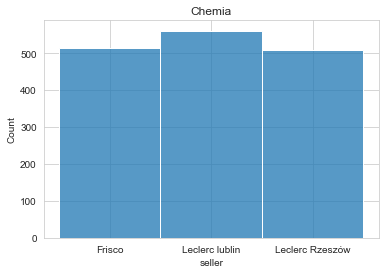

In [20]:
sns.histplot(df[df['main_category'] == 'chemia'], x='seller').set_title('Chemia')

Text(0.5, 1.0, 'Napoje')

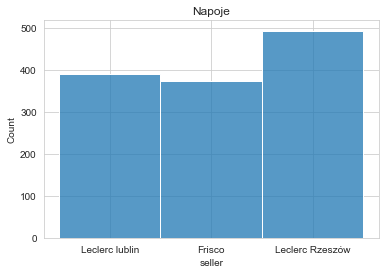

In [21]:
sns.histplot(df[df['main_category'] == 'napoje'], x='seller').set_title('Napoje')

## Normalization to WDC v2 format

In [39]:
df.fillna('', inplace=True)

In [53]:
def to_WDC_standard(data):
    wdc_df = pd.DataFrame({'id':data.index}).set_index('id')
    wdc_df['cluster_id'] = data['EAN']
    wdc_df['category'] = data['main_category']
    wdc_df['title'] = data['title']
    wdc_df['description'] = data['description']
    wdc_df['brand'] = data['brand']
    wdc_df['price'] = data['price']
    wdc_df['identifiers'] = [[{'EAN': [e]}] for e in data['EAN'].to_list()]
    spec_table = 'amount ' + data['amount']
    for c in ['capacity', 'extras', 'image_url', 'ingredients', 'origin', 'storage', 'url', 'weight']:
        s =  ' ' + c + ' ' + data[c]
        spec_table += s
    wdc_df['specTableContent'] = spec_table
    wdc_df['keyValuePairs'] = data.loc[:, ['amount', 'capacity', 'extras', 'image_url', 'ingredients', 'origin', 'storage', 'url', 'weight']].to_dict(orient='records')
    return wdc_df

In [54]:
wdc_df_non_normalized = to_WDC_standard(df)
wdc_df_non_normalized.head()

,cluster_id,category,title,description,brand,price,identifiers,specTableContent,keyValuePairs
id,,,,,,,,,
4962,5900627092134,chemia,AIR WICK Botanica Odświeżacz powietrza Marokań...,"Tylko składniki, których potrzebujesz\n\nWspan...",AIR WICK,14.99,[{'EAN': ['5900627092134']}],amount 19 ml capacity 19 ml extras image_url ...,"{'amount': '19 ml', 'capacity': '19 ml', 'extr..."
2504,5900627024210,chemia,CILLIT BANG Super Silny Środek do tłuszczu - s...,Nasz wyjątkowo skuteczny płyn Cillit Bang Odtł...,CILLIT BANG,10.99,[{'EAN': ['5900627024210']}],amount 750 ml capacity 750 ml extras image_ur...,"{'amount': '750 ml', 'capacity': '750 ml', 'ex..."
3651,5900627008203,chemia,CALGON 2w1 ActiClean Proszek Zmiękczacz wody,"Bez Calgonu\nKamień, brud i pozostałości po de...",CALGON,16.99,[{'EAN': ['5900627008203']}],amount 500 g capacity extras image_url https...,"{'amount': '500 g', 'capacity': '', 'extras': ..."
4285,5000204116656,chemia,GLADE Zapas do elektrycznego odświeżacza powie...,"Wybierz intensywność zapachu, ustawiając przeł...",GLADE,14.99,[{'EAN': ['5000204116656']}],amount 20 ml capacity 20 ml extras image_url ...,"{'amount': '20 ml', 'capacity': '20 ml', 'extr..."
5168,5900541000048,napoje,"Żywiec Zdrój Mocny Gaz Woda źródlana 6 x 1,5 l",,Żywiec Zdrój,"12,99 zł",[{'EAN': ['5900541000048']}],amount 9.03 L capacity extras image_url http...,"{'amount': '9.03 L', 'capacity': '', 'extras':..."


[{'amount': '19 ml',
  'capacity': '19 ml',
  'extras': '',
  'image_url': 'https://www.frisco.pl/pid,123169/n,air-wick-botanica-odswiezacz-powietrza-marokanska-mieta---rozowy-grejpfrut/stn,product',
  'ingredients': '',
  'origin': '',
  'storage': 'Przechowywać w oryginalnym pojemniku lub zatwierdzonym pojemniku alternatywnym, wykonanym z kompatybilnego materiału. Nieużywane pojemniki trzymać szczelnie zamknięte. Opróżnione pojemniki zawierają pozostałości produktu i mogą być niebezpieczne. Pojemników nie używać ponownie. Nie przechowywać w temperaturze powyżej 50 °C Przechowywać zgodnie z obowiązującymi przepisami. Przechowywać w oryginalnym, właściwie oznakowanym pojemniku w suchym, chłodnym i dobrze wentylowanym miejscu. Chronić przed bezpośrednim działaniem promieni słonecznych.',
  'url': 'https://www.frisco.pl/pid,123169/n,air-wick-botanica-odswiezacz-powietrza-marokanska-mieta---rozowy-grejpfrut/stn,product',
  'weight': ''},
 {'amount': '750 ml',
  'capacity': '750 ml',
  'ex